<a href="https://colab.research.google.com/github/linokv/Car-MSRP-Prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>MACHINE LEARNING MODEL FOR PREDICTING CAR MSRP

I am using multiple regression models to predict car MSRP by using Features of the car

In [ ]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1><b> About Dataset


In [ ]:
#
df=pd.read_csv('/content/data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


installing package category to use category encoding

In [ ]:
!pip install category_encoders


In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [ ]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

<h1><b> Filling Missing Values

In [ ]:
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])
df['Engine HP']=df['Engine HP'].fillna(df['Engine HP'].mean())
df['Engine Cylinders']=df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean())
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

<h1><b> Droping rows with missing values in market category

In [ ]:
df.dropna(subset = ['Market Category'], inplace=True)
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

<h2><b>EXPLORATORY DATA ANALYSIS(EDA)<b></h2>

<h2> Distribution of Vehicles By Year Of Regestration

<Axes: title={'center': 'Distribution of vehicles by Year'}, xlabel='Year', ylabel='count'>

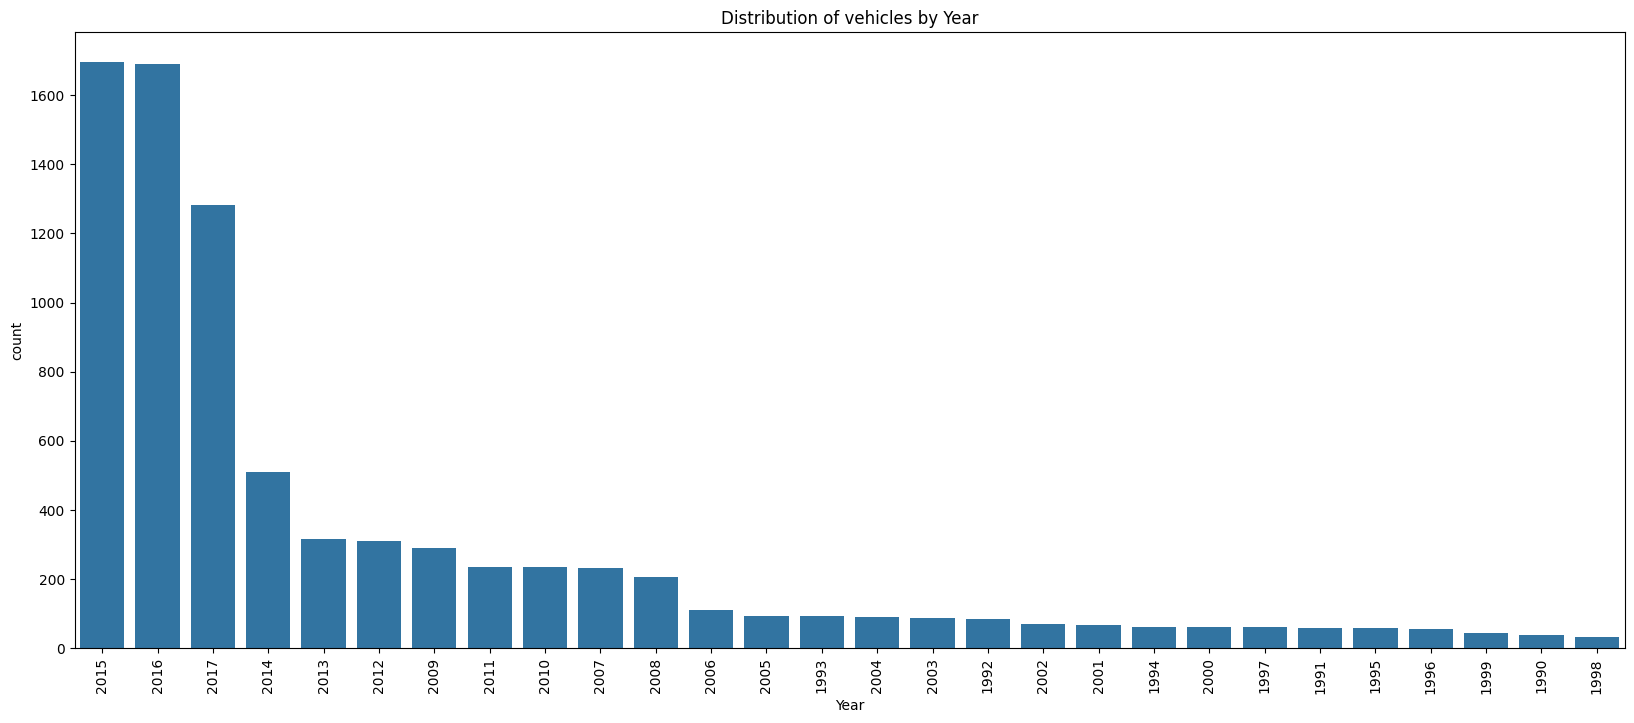

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.title('Distribution of vehicles by Year')
sns.countplot(x=df['Year'] ,order=df['Year'].value_counts().index)

<h2>Fuel Types

<Axes: xlabel='Engine Fuel Type', ylabel='count'>

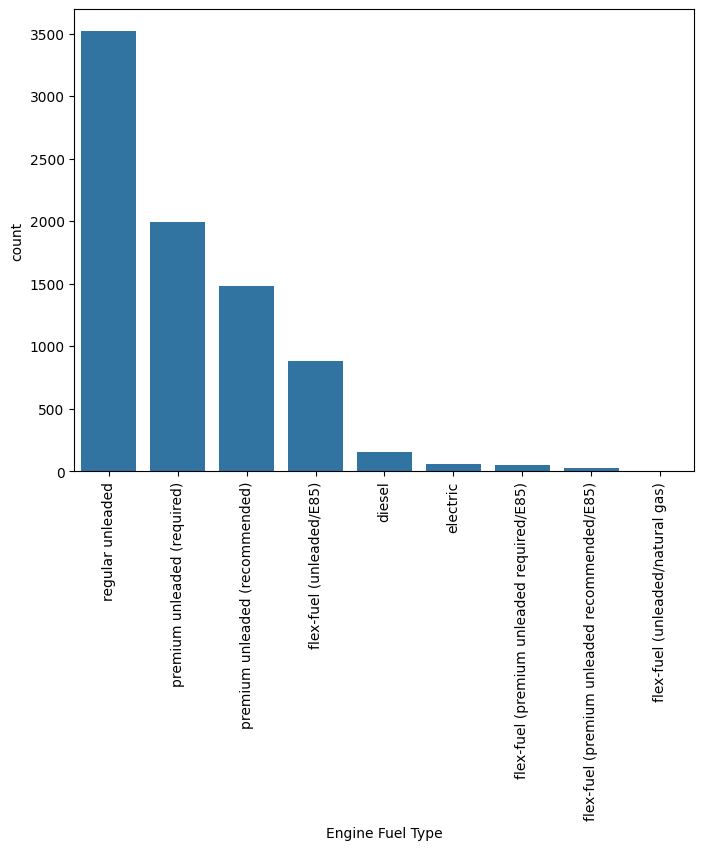

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(x=df['Engine Fuel Type'] ,order=df['Engine Fuel Type'].value_counts().index)

<h2>Power by each brand

<Axes: xlabel='Make', ylabel='Engine HP'>

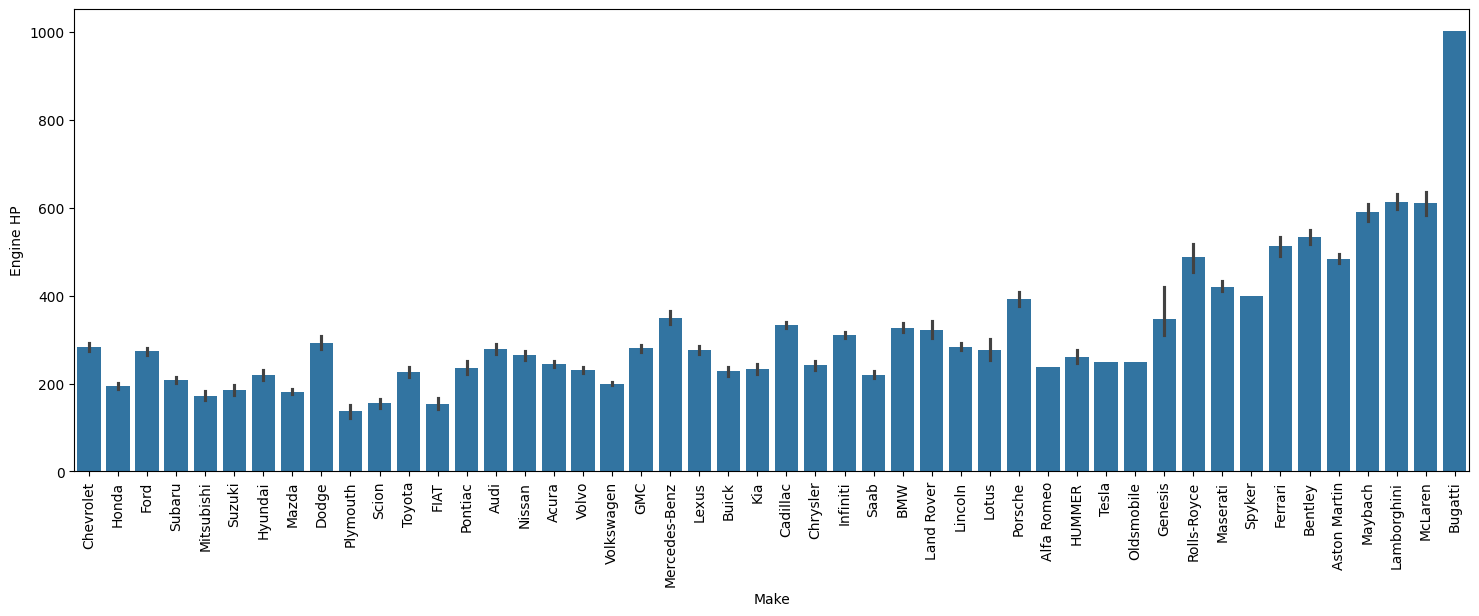

In [ ]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)

sns.barplot(x='Make',y='Engine HP', data=df, order=df.sort_values('Engine HP')['Make'])


In [ ]:
df.sort_values('Engine HP').Make

6798       Chevrolet
6794       Chevrolet
2533           Honda
2528           Honda
1471            Ford
            ...     
1630     Lamborghini
1629     Lamborghini
11363        Bugatti
11364        Bugatti
11362        Bugatti
Name: Make, Length: 8172, dtype: object

Vehicle style to msrp

<Axes: xlabel='Vehicle Style', ylabel='MSRP'>

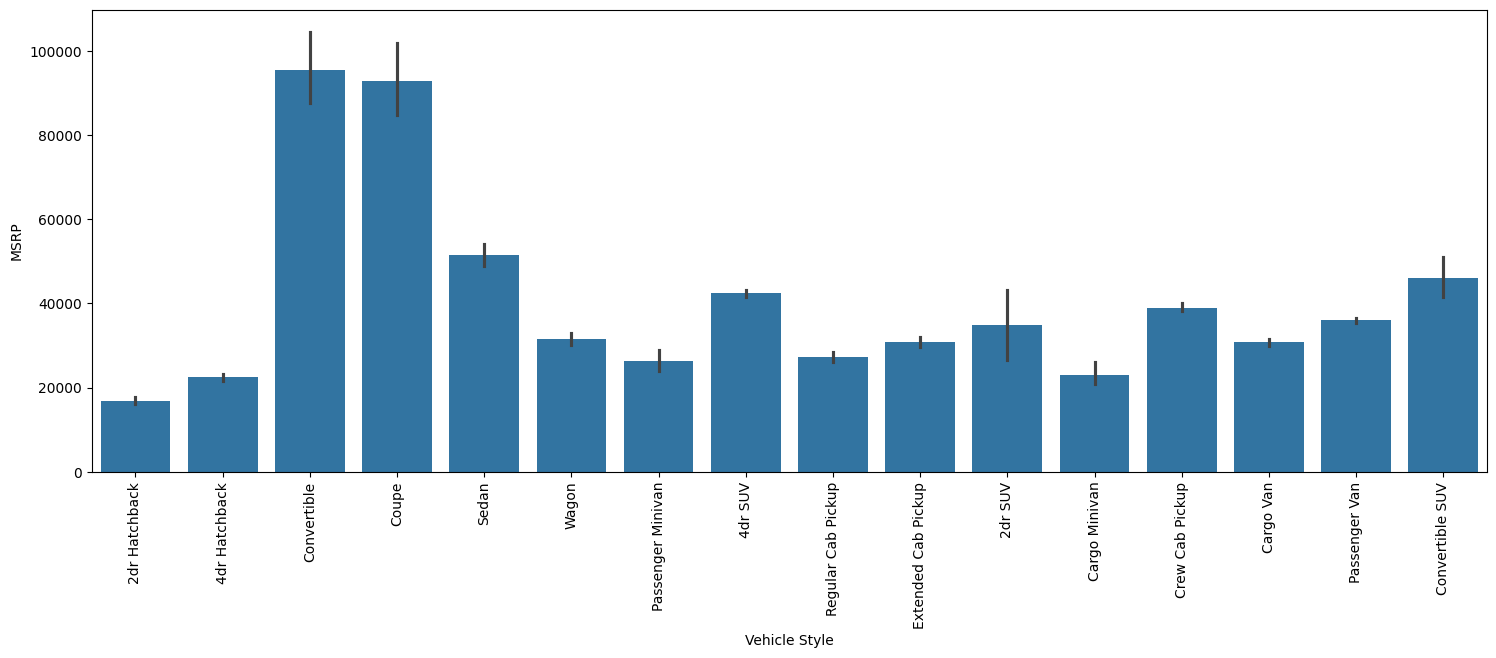

In [ ]:
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)

sns.barplot(x='Vehicle Style',y='MSRP', data=df, order=df.sort_values('MSRP')['Vehicle Style'])


In [ ]:
df.sort_values('MSRP')['Vehicle Style']

1469     2dr Hatchback
9152     4dr Hatchback
9151       Convertible
9150     4dr Hatchback
9149     2dr Hatchback
             ...      
6351       Convertible
8486             Coupe
11363            Coupe
11364            Coupe
11362            Coupe
Name: Vehicle Style, Length: 8172, dtype: object

<h1><b> Outliers

<Axes: ylabel='highway MPG'>

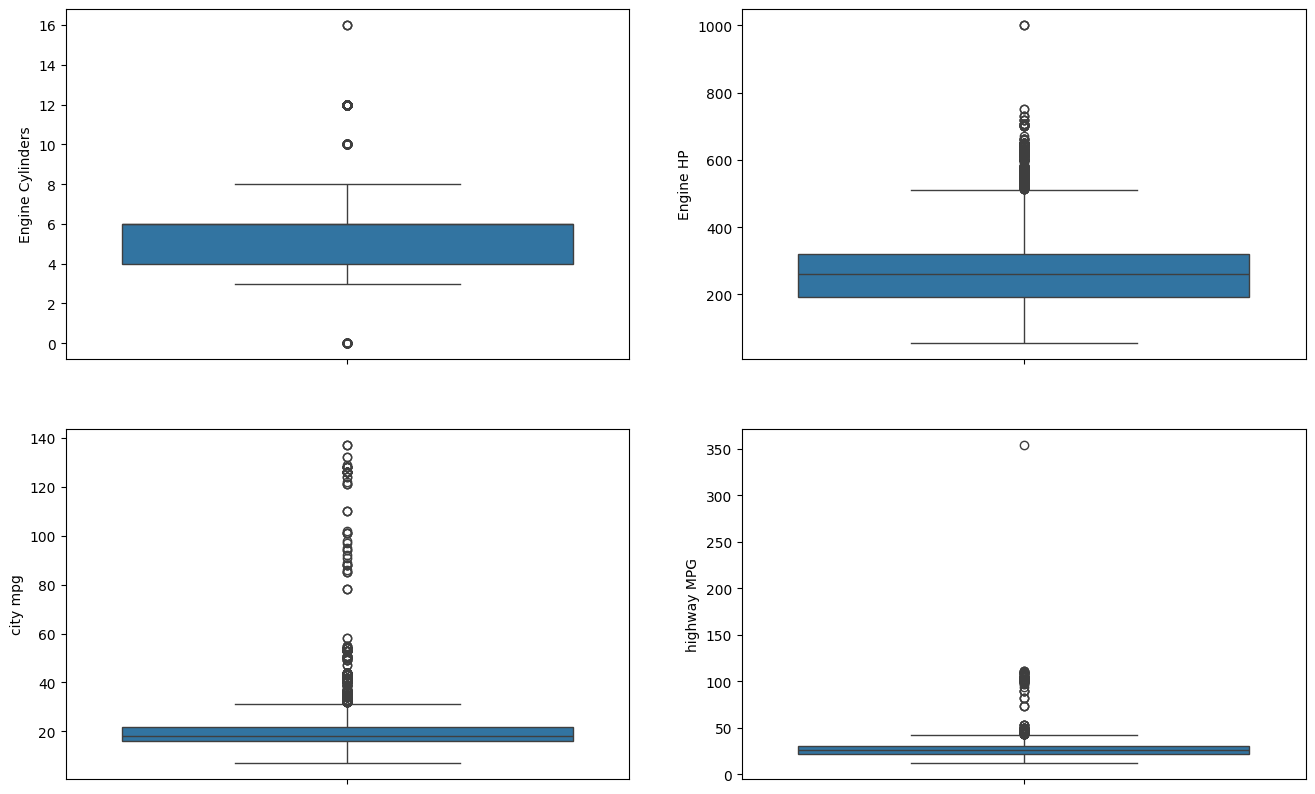

In [ ]:
#boxplot
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.boxplot(y=df['Engine Cylinders'],ax=ax[0][0])
sns.boxplot(y=df['Engine HP'],ax=ax[0][1])
sns.boxplot(y=df['city mpg'],ax=ax[1][0])
sns.boxplot(y=df['highway MPG'],ax=ax[1][1])

<Axes: ylabel='Popularity'>

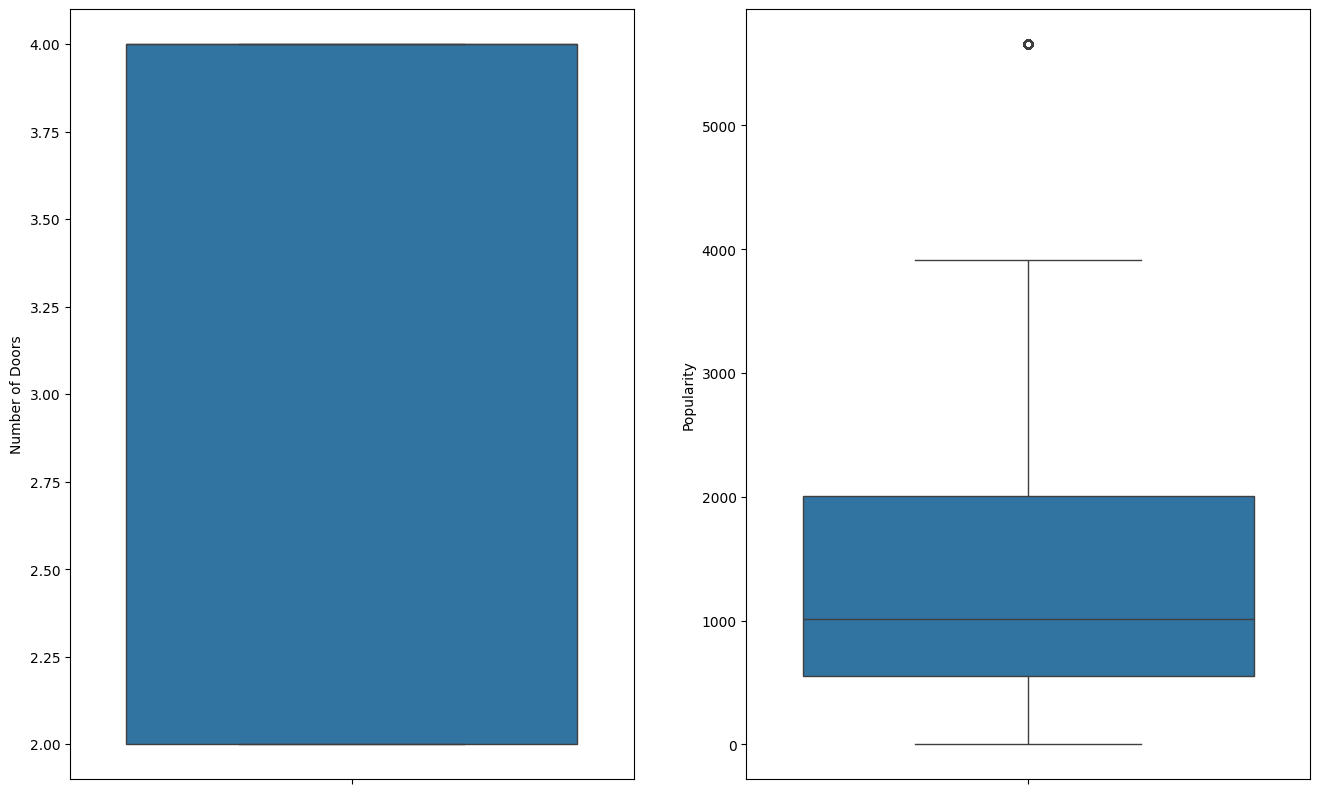

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,10))
sns.boxplot(y=df['Number of Doors'],ax=ax[0])
sns.boxplot(y=df['Popularity'],ax=ax[1])

<Axes: xlabel='MSRP', ylabel='highway MPG'>

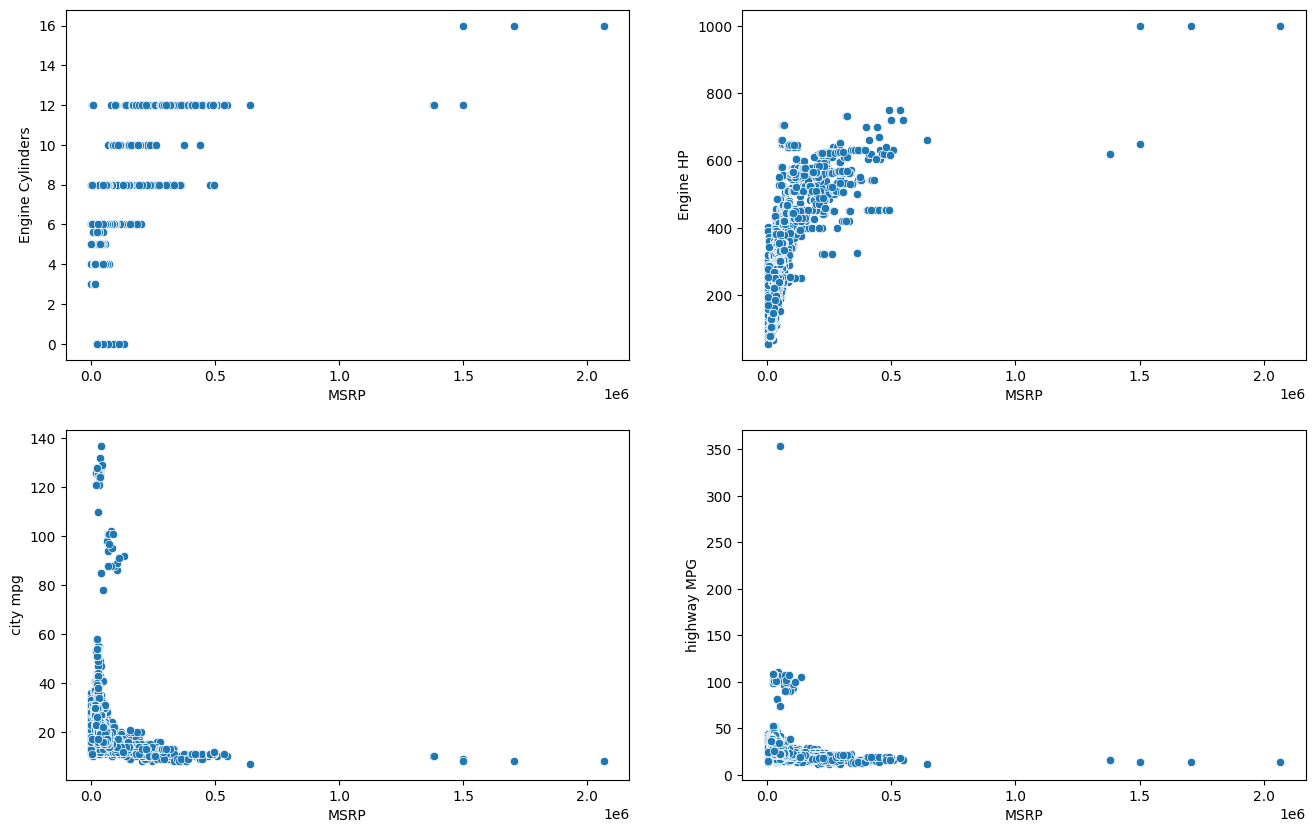

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.scatterplot(y=df['Engine Cylinders'],x=df['MSRP'],ax=ax[0][0])
sns.scatterplot(y=df['Engine HP'],x=df['MSRP'],ax=ax[0][1])
sns.scatterplot(y=df['city mpg'],x=df['MSRP'],ax=ax[1][0])
sns.scatterplot(y=df['highway MPG'],x=df['MSRP'],ax=ax[1][1])

<Axes: xlabel='MSRP', ylabel='Popularity'>

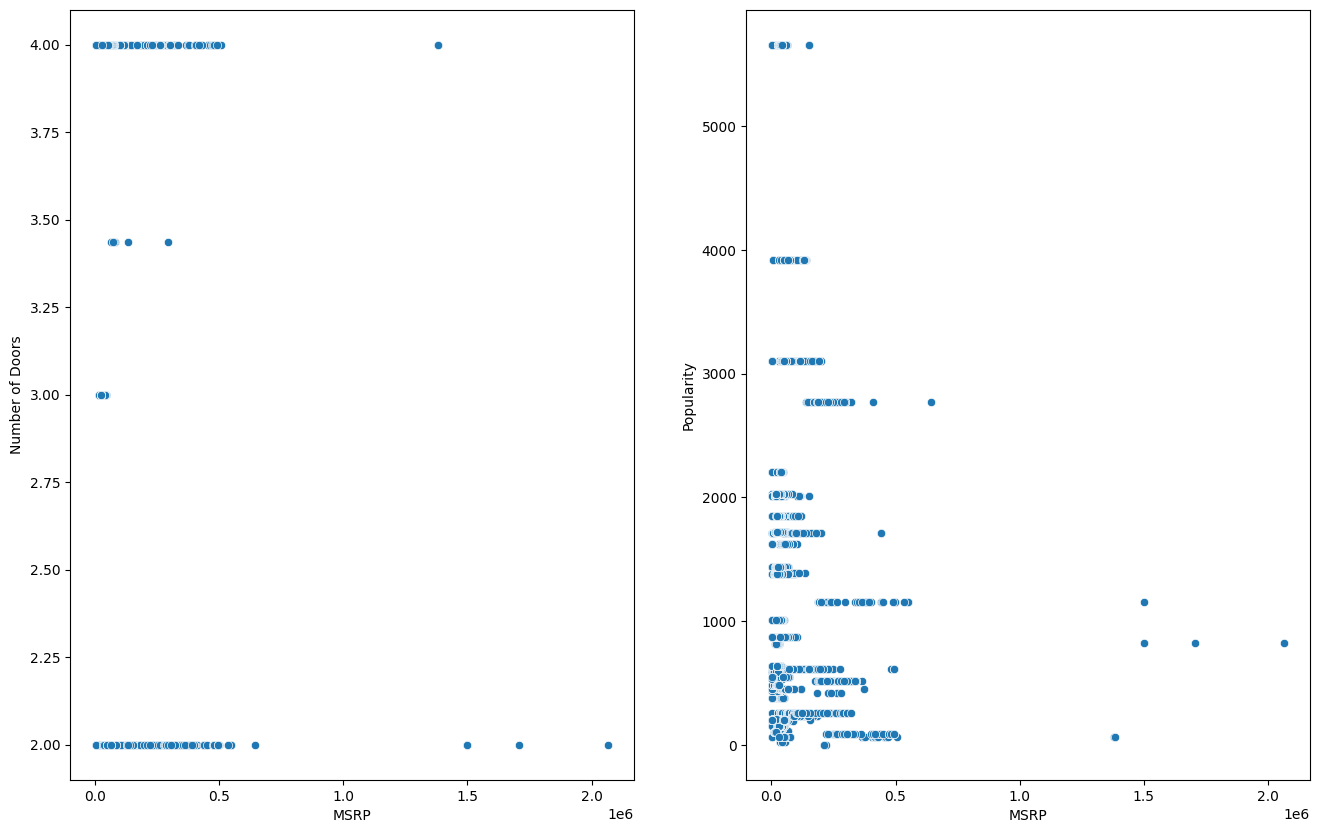

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,10))
sns.scatterplot(y=df['Number of Doors'],x=df['MSRP'],ax=ax[0])
sns.scatterplot(y=df['Popularity'],x=df['MSRP'],ax=ax[1])

In [ ]:
#df= df.drop(df['Popularity'].max())

<h1><b>Outlier in popularity

In [ ]:
rslt_df_plr = df[df['Popularity'] ==5657]
rslt_df_plr

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1469,Ford,Aspire,1995,regular unleaded,63.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,38,31,5657,2000
1470,Ford,Aspire,1995,regular unleaded,63.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,38,31,5657,2000
1471,Ford,Aspire,1995,regular unleaded,63.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,38,31,5657,2000
1472,Ford,Aspire,1996,regular unleaded,63.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,38,29,5657,2000
1473,Ford,Aspire,1996,regular unleaded,63.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,38,29,5657,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,Ford,Transit Wagon,2017,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Large,Passenger Van,19,14,5657,35825
10735,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Large,Passenger Van,19,14,5657,42220
10736,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Midsize,Passenger Van,19,14,5657,39460
10737,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Midsize,Passenger Van,19,14,5657,38165


<h3> Engine Hp Value counts

In [ ]:
df['Engine HP'].value_counts()

Engine HP
200.0    283
240.0    261
210.0    259
285.0    213
300.0    172
        ... 
622.0      1
557.0      1
572.0      1
535.0      1
154.0      1
Name: count, Length: 330, dtype: int64

<h2> checking Engine HP Values

In [ ]:
rslt_df_ehp = df[df['Engine HP'] >800]
rslt_df_ehp

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769


<h3> To check reason for Engine Cylinder = 0

In [ ]:
df['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                                3518
premium unleaded (required)                     1991
premium unleaded (recommended)                  1481
flex-fuel (unleaded/E85)                         881
diesel                                           154
electric                                          61
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
Name: count, dtype: int64

In [ ]:
df['Engine Cylinders'].value_counts()

Engine Cylinders
4.000000     3126
6.000000     2923
8.000000     1545
12.000000     230
5.000000      170
10.000000      68
0.000000       51
5.628829       30
3.000000       26
16.000000       3
Name: count, dtype: int64

<h3> printing Engine cylinder =0

In [ ]:
rslt_df_Cyl = df[df['Engine Cylinders'] ==0]
rslt_df_Cyl

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.000000,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.000000,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,2.000000,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.00000,0.0,DIRECT_DRIVE,front wheel drive,4.000000,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.00000,0.0,DIRECT_DRIVE,front wheel drive,4.000000,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.00000,0.0,DIRECT_DRIVE,front wheel drive,4.000000,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
4705,Honda,Fit EV,2013,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,4.000000,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,4.000000,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4785,Ford,Focus,2015,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,4.000000,Hatchback,Compact,4dr Hatchback,99,110,5657,29170
4789,Ford,Focus,2016,electric,249.38607,0.0,DIRECT_DRIVE,front wheel drive,4.000000,Hatchback,Compact,4dr Hatchback,99,110,5657,29170


<h3> Checking Outlier in Engine Cylinder

In [ ]:
rslt_df_Cyl2 = df[df['Engine Cylinders'] ==16]
rslt_df_Cyl2

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11362,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,2065902
11363,Bugatti,Veyron 16.4,2008,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1500000
11364,Bugatti,Veyron 16.4,2009,premium unleaded (required),1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,14,8,820,1705769


<h3> Outlier in Highway MPG

In [ ]:
rslt_mpg = df[df['highway MPG'] >300]
rslt_mpg

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


<h1><b> Features

<Axes: >

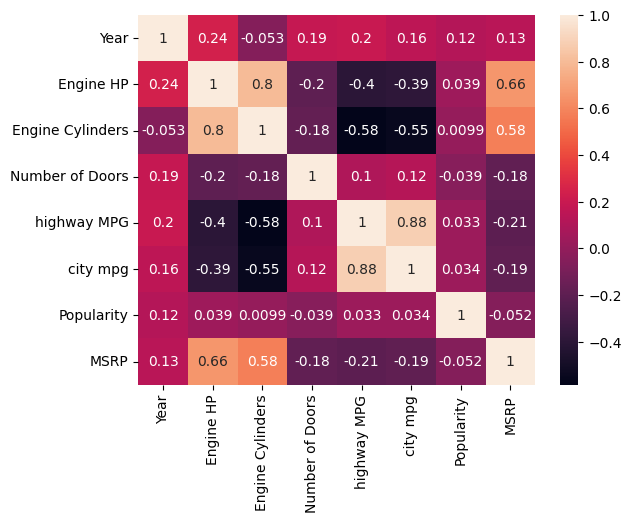

In [ ]:
num_df=df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr(),annot=True)

<h3><b> Feature Extraction
creating a new feature : average price for each brand

*  using category encoder

In [ ]:
#add average msrp for each brand
import category_encoders as ce
df_new=df
tenc=ce.TargetEncoder()
df_new=tenc.fit_transform(df_new['Make'],df['MSRP'])

df_new = df_new.join(df_new.drop('Make',axis = 1))
df_new.rename(columns = {'Make':'Average Make Price'}, inplace = True)
df_new

,Average Make Price
0,61546.763473
1,61546.763473
2,61546.763473
3,61546.763473
4,61546.763473
...,...
11909,34887.587303
11910,34887.587303
11911,34887.587303
11912,34887.587303


<h2> Dropping

In [ ]:
df.drop(['Make','Model','Number of Doors'],axis=1,inplace=True)
df

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


<h3> Adding new feature Average price




In [ ]:
df=pd.concat([df,df_new],axis=1)
df

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Average Make Price
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,61546.763473
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,61546.763473
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,61546.763473
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,61546.763473
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,18,3916,34500,61546.763473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,34887.587303
11910,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,34887.587303
11911,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,34887.587303
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,34887.587303


<h2>  Splitting Market category

In [ ]:
df['Market Category'] = df['Market Category'].str.split(',')
#print dataframe
df = df.explode('Market Category')
df

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Average Make Price
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Factory Tuner,Compact,Coupe,26,19,3916,46135,61546.763473
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Coupe,26,19,3916,46135,61546.763473
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,High-Performance,Compact,Coupe,26,19,3916,46135,61546.763473
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Luxury,Compact,Convertible,28,19,3916,40650,61546.763473
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Performance,Compact,Convertible,28,19,3916,40650,61546.763473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Luxury,Midsize,4dr Hatchback,23,16,204,50620,34887.587303
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Crossover,Midsize,4dr Hatchback,23,16,204,50920,34887.587303
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Hatchback,Midsize,4dr Hatchback,23,16,204,50920,34887.587303
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Luxury,Midsize,4dr Hatchback,23,16,204,50920,34887.587303


<h1><b> Encoding

In [ ]:
#get dummies
df=pd.get_dummies(df, columns=['Engine Fuel Type','Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'], drop_first=True)
df

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP,Average Make Price,Engine Fuel Type_electric,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,26,19,3916,46135,61546.763473,False,False,...,False,False,True,False,False,False,False,False,False,False
0,2011,335.0,6.0,26,19,3916,46135,61546.763473,False,False,...,False,False,True,False,False,False,False,False,False,False
0,2011,335.0,6.0,26,19,3916,46135,61546.763473,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,28,19,3916,40650,61546.763473,False,False,...,True,False,False,False,False,False,False,False,False,False
1,2011,300.0,6.0,28,19,3916,40650,61546.763473,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11911,2012,300.0,6.0,23,16,204,50620,34887.587303,False,False,...,False,False,False,False,False,False,False,False,False,False
11912,2013,300.0,6.0,23,16,204,50920,34887.587303,False,False,...,False,False,False,False,False,False,False,False,False,False
11912,2013,300.0,6.0,23,16,204,50920,34887.587303,False,False,...,False,False,False,False,False,False,False,False,False,False
11912,2013,300.0,6.0,23,16,204,50920,34887.587303,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg',
       'Popularity', 'MSRP', 'Average Make Price', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/E85)',
       'Engine Fuel Type_flex-fuel (unleaded/natural gas)',
       'Engine Fuel Type_premium unleaded (recommended)',
       'Engine Fuel Type_premium unleaded (required)',
       'Engine Fuel Type_regular unleaded', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_four wheel drive',
       'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive',
       'Market Category_Diesel', 'Market Category_Exotic',
       'Market Category_Factory Tuner', 'Market Category_Flex Fuel',
       'Market Category_Hatchback', 'Market Category_High-Per

In [ ]:
df.isna().sum()

Year                                                             0
Engine HP                                                        0
Engine Cylinders                                                 0
highway MPG                                                      0
city mpg                                                         0
Popularity                                                       0
MSRP                                                             0
Average Make Price                                               0
Engine Fuel Type_electric                                        0
Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)    0
Engine Fuel Type_flex-fuel (premium unleaded required/E85)       0
Engine Fuel Type_flex-fuel (unleaded/E85)                        0
Engine Fuel Type_flex-fuel (unleaded/natural gas)                0
Engine Fuel Type_premium unleaded (recommended)                  0
Engine Fuel Type_premium unleaded (required)                  

<h2> <b> Splitting X And Y

In [ ]:
x=df.drop(['MSRP'],axis=1)
y=df['MSRP']
y

0        46135
0        46135
0        46135
1        40650
1        40650
         ...  
11911    50620
11912    50920
11912    50920
11912    50920
11913    28995
Name: MSRP, Length: 12903, dtype: int64

<h2><b> Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#from sklearn.linear_model import LinearRegression
#model=LinearRegression()
#model.fit(x_train,y_train)
#y_pred=model.predict(x_test)
#y_pred

In [ ]:
#from sklearn.metrics import mean_absolute_percentage_error,r2_score
#print('R2 score is',r2_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_absolute_error

In [ ]:
#print('absolute mean percentage error is',mean_absolute_percentage_error(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

In [ ]:
model=('LINEAER REGRESSION','DECISION TREE REGRESSOR','RANDOM FOREST REGRESSOR')
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]
r2_list=[]

In [ ]:
for i in models:
  print("Model Name is ",i)
  print('*'*50)
  mod=i().fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  r2=r2_score(y_test, y_pred)
  r2_list.append(r2)
  print("R2 score:", r2_score(y_test, y_pred))
  print("MAE score:", mean_absolute_error(y_test, y_pred))
  print("MAPE score:", mean_absolute_percentage_error(y_test, y_pred))
  print("="*50)

Model Name is  <class 'sklearn.linear_model._base.LinearRegression'>
**************************************************
R2 score: 0.7374905252610793
MAE score: 19554.22760653618
MAPE score: 0.8565292707529376
Model Name is  <class 'sklearn.tree._classes.DecisionTreeRegressor'>
**************************************************
R2 score: 0.9913165272381277
MAE score: 3381.5887940742628
MAPE score: 0.06694999608822239
Model Name is  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
**************************************************
R2 score: 0.991159734938201
MAE score: 3518.4409948718435
MAPE score: 0.06540143713095105
